In [26]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from random import shuffle
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


import cv2

from sklearn.model_selection import train_test_split
import plotly.express as px
from plotly import offline
offline.init_notebook_mode(connected = True)

# Reading data

In [27]:
BASE_DIR = '../input/four-shapes/shapes'
shapes = os.listdir(BASE_DIR)
shapes

['triangle', 'circle', 'square', 'star']

In [28]:
#-------------get train/test data-----------------
data = []
target = []
for i, shape in enumerate(shapes):
    path = os.path.join(BASE_DIR, shape)
    for filename in os.listdir(path):
        image = cv2.imread(os.path.join(path , filename),0)
        image = image.reshape(200,200,1)
        data.append(image)
        target.append(i)

# Preprocessing

In [29]:
data = np.array(data)
target = np.array(target)
target = to_categorical(target)

In [30]:
data.shape, target.shape

((14970, 200, 200, 1), (14970, 4))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data, target, stratify=target,random_state= 42, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train,random_state= 42, test_size = 0.15)

# Split Dataset to train\test
#(trainX, testX, trainY, testY) = train_test_split(Dataset, Labels, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("X Test shape:", X_test.shape)
print("Y Train shape:", y_train.shape)
print("Y Test shape:", y_test.shape)

X Train shape: (10179, 200, 200, 1)
X Test shape: (2994, 200, 200, 1)
Y Train shape: (10179, 4)
Y Test shape: (2994, 4)


Let's check some images to see if everything is alright

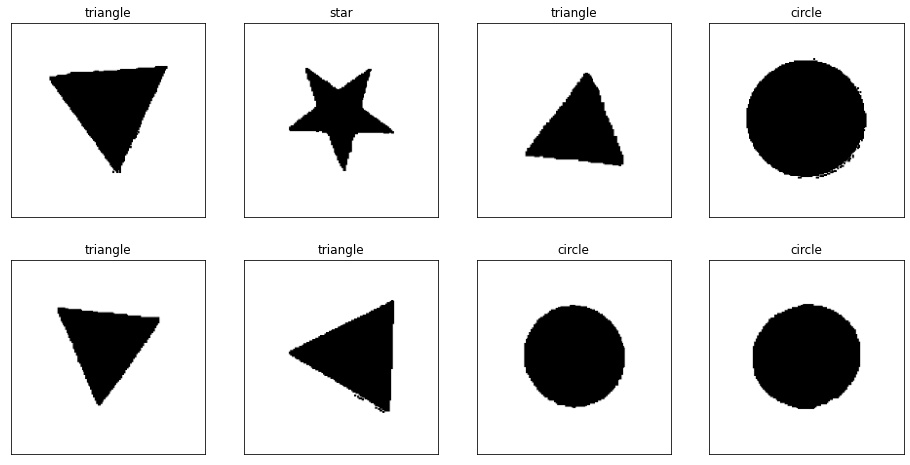

In [32]:
def show_images(count, X, y):
    fig, axes =plt.subplots(count//4,4, figsize = (16, count))
    for i, ind in enumerate(np.random.randint(0, X.shape[0] , count)):
        ax = axes[i//4][i%4] 
        ax.imshow(X[ind],cmap = 'gray')
        ax.title.set_text(shapes[np.argmax(y[ind])])
        ax.set_xticks([]) 
        ax.set_yticks([])
show_images(8, X_train, y_train)

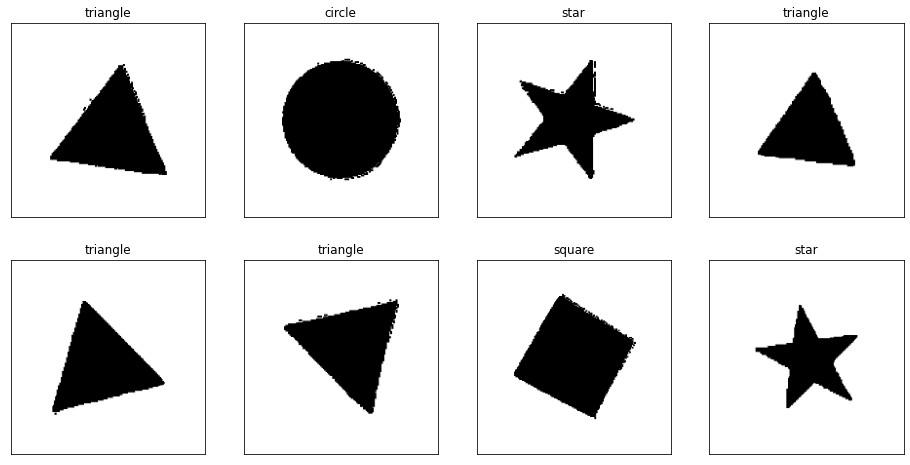

In [33]:
show_images(8, X_val, y_val)

Everything looks ok. ~~Let's do some image augmentation~~. It turned out that, there is no need for it

In [ ]:
# train_datagen = ImageDataGenerator(

#     rotation_range=180,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     rescale = 1.0/255,
#     horizontal_flip=True,
#     vertical_flip=True)

# val_datagen = ImageDataGenerator(rescale = 1.0/255)

In [34]:
# train_generator = train_datagen.flow(X_train, y_train)
# val_generator = val_datagen.flow(X_val, y_val)
X_test = X_test/255.0
X_train = X_train/255.0
X_val = X_val/255.0

In [35]:
model = Sequential([
    Conv2D(32, (3,3),strides = 2 ,input_shape = (200,200,1), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(),
    #Conv2D(32, (3,3), activation = 'relu'),
    #MaxPooling2D(),
    #Conv2D(32, (3,3), activation = 'relu'),
    #MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(64, activation = 'relu'),
    Dropout(0.5),
    Dense(4, activation = 'softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 99, 99, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16928)             0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16928)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [36]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_val, y_val))

Epoch 1/30
319/319 [==============================] - 3s 9ms/step - loss: 0.5687 - accuracy: 0.7620 - val_loss: 0.0065 - val_accuracy: 0.9972
Epoch 2/30
319/319 [==============================] - 2s 8ms/step - loss: 0.0278 - accuracy: 0.9923 - val_loss: 0.0015 - val_accuracy: 0.9994
Epoch 3/30
319/319 [==============================] - 2s 8ms/step - loss: 0.0125 - accuracy: 0.9959 - val_loss: 7.4766e-05 - val_accuracy: 1.0000
Epoch 4/30
319/319 [==============================] - 3s 8ms/step - loss: 0.0089 - accuracy: 0.9975 - val_loss: 1.4410e-05 - val_accuracy: 1.0000
Epoch 5/30
319/319 [==============================] - 2s 8ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 4.7532e-07 - val_accuracy: 1.0000
Epoch 6/30
319/319 [==============================] - 2s 8ms/step - loss: 0.0078 - accuracy: 0.9974 - val_loss: 8.9728e-05 - val_accuracy: 1.0000
Epoch 7/30
319/319 [==============================] - 2s 8ms/step - loss: 0.0096 - accuracy: 0.9975 - val_loss: 1.5161e-05 - val_acc

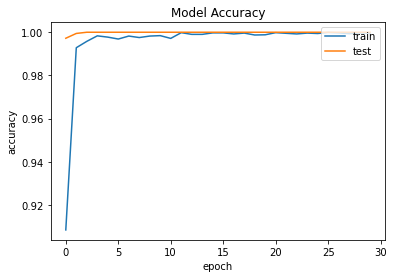

In [37]:
import matplotlib.pyplot as plt
#plotting the Accuracy of test and training sets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

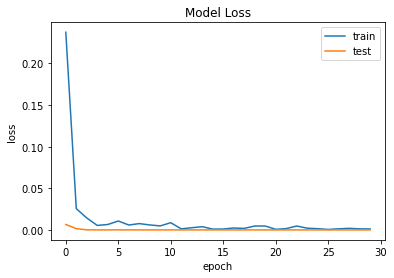

In [38]:
#plotting the loss of test and training sets
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

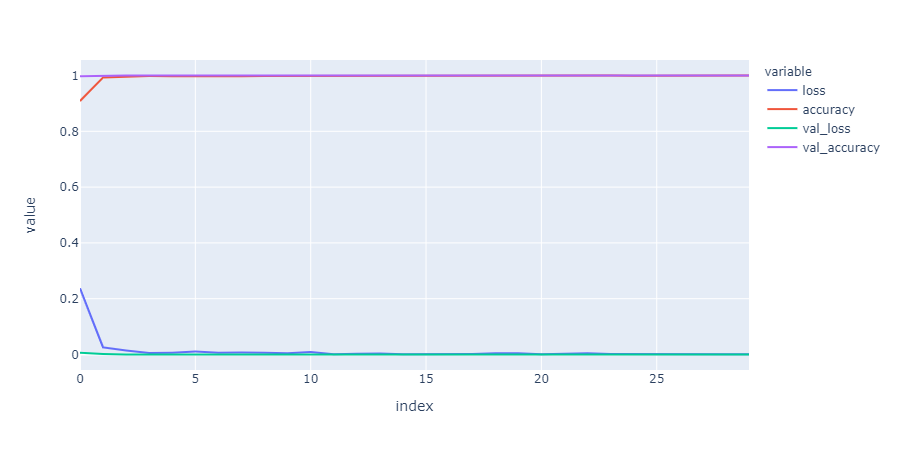

In [39]:
metrics = pd.DataFrame(history.history)
px.line(metrics)

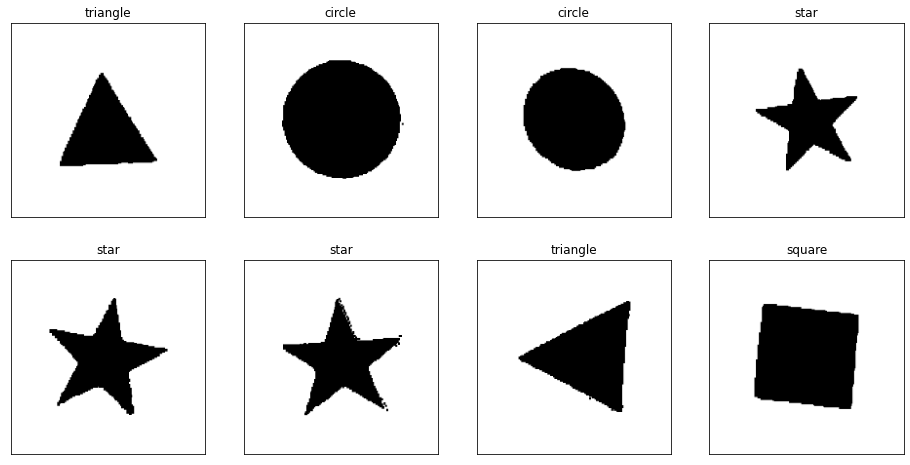

In [41]:
preds = model.predict(X_test)
show_images(8,X_test, preds)

In [42]:
model.save('ttrained_model.h5')

In [ ]:
model.save('ttrained_model.h5')


That is it for this notebook. If you liked my work, please upvote